<a href="https://colab.research.google.com/github/sharna33/CSE4120_Data_Mining_Sessional/blob/main/CSE_4120_2003009_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 15.07.25

# **Roll: 2003009**

## **Chi-Square**

## **Import Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

## **CSV File Load**

In [46]:
path = "https://raw.githubusercontent.com/sharna33/CSE4120_Data_Mining_Sessional/refs/heads/main/heart-disease.csv"
df = pd.read_csv(path)

print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

## **Converting Dataset into NumPy Array**

In [47]:
data_np = df.values
print("\nFirst 5 rows in NumPy array:")
print(data_np[:5])


First 5 rows in NumPy array:
[[ 52.    1.    0.  125.  212.    0.    1.  168.    0.    1.    2.    2.
    3.    0. ]
 [ 53.    1.    0.  140.  203.    1.    0.  155.    1.    3.1   0.    0.
    3.    0. ]
 [ 70.    1.    0.  145.  174.    0.    1.  125.    1.    2.6   0.    0.
    3.    0. ]
 [ 61.    1.    0.  148.  203.    0.    1.  161.    0.    0.    2.    1.
    3.    0. ]
 [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9   1.    3.
    2.    0. ]]


## **Handling Missing Values**

In [48]:
print("\nMissing values before filling:")
print(df.isnull().sum())

df_filled = df.fillna(df.mean())

print("\nMissing values after filling:")
print(df_filled.isnull().sum())


Missing values before filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## **Creating Scatter Plot**

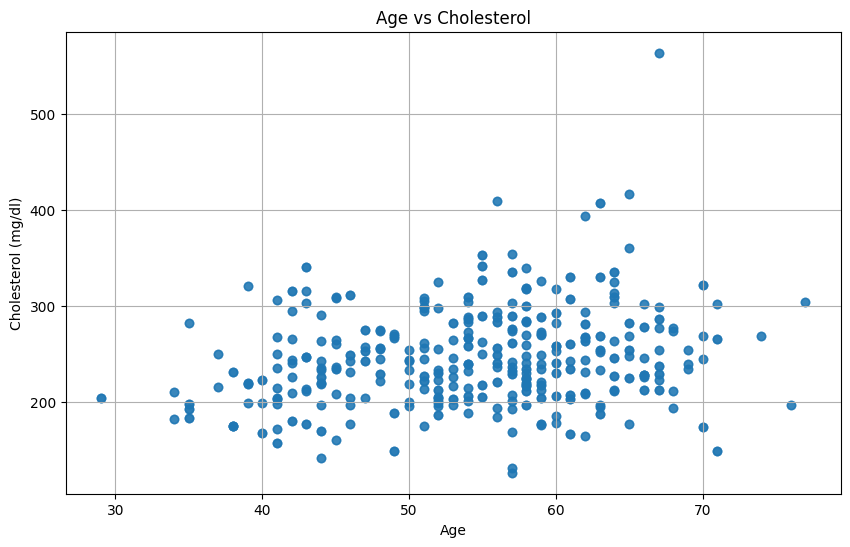

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filled.iloc[:, 0], df_filled.iloc[:, 4], alpha=0.5)
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.grid(True)
plt.show()

## **Chi-Square Test**

In [52]:
age_bins = pd.cut(df_filled['age'], bins=10)
chol_bins = pd.cut(df_filled['chol'], bins=10)

contingency_table = pd.crosstab(df_filled[cat_feature1], df_filled[cat_feature2])
print("\nContingency Table:")
print(contingency_table)

observed = contingency_table.values

rows = observed.sum(axis=1).reshape(-1, 1)
cols = observed.sum(axis=0).reshape(1, -1)
total = observed.sum()

expected = rows @ cols / total

# Manual Calculation
chi_square_stat_manual = ((observed - expected) ** 2 / expected).sum()

dof_manual = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# Scipy Canculation
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"\nChi-Square Statistic (Manual): {chi_square_stat_manual}")
print(f"Degrees of Freedom (Manual): {dof_manual}")

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, dof_manual)

print(f"\nChi-Square Statistic (Scipy): {chi2_stat}")
print(f"Degrees of Freedom (Scipy): {dof}")
print(f"Critical-value (Scipy): {critical_value}")

if critical_value < 0.05:
    print("Reject null hypothesis: The two categorical attributes are correlated.")
else:
    print("Fail to reject null hypothesis: No correlation between features.")


Contingency Table:
chol  126  131  141  149  157  160  164  166  167  168  ...  341  342  353  \
age                                                     ...                  
29      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
34      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
35      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
37      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
38      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
39      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
40      0    0    0    0    0    0    0    0    4    0  ...    0    0    0   
41      0    0    0    0    4    0    0    0    0    0  ...    0    0    0   
42      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
43      0    0    0    0    0    0    0    0    0    0  ...    4    0    0   
44      0    0    3    0    0    0    0    0